In [1]:
# Package Setup
import Pkg;
# Pkg.update()

# Julia Packages
using Distributions
using LinearAlgebra
using Statistics
using PGFPlots

# Satellite Dynamics Packages
using SatelliteDynamics

# Load SatelliteTasking - Reclone to keep version current
Pkg.clone("..")
using SatelliteTasking
using SatelliteTasking.Analysis

┌ Warning: Pkg.clone is only kept for legacy CI script reasons, please use `add`
└ @ Pkg.API /Users/osx/buildbot/slave/package_osx64/build/usr/share/julia/stdlib/v1.1/Pkg/src/API.jl:386


 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [2]:
# Configure simulation
epc0 = Epoch(2019, 1, 1, 0, 0, 0, tsys=:UTC) # Start of time span
epcf = Epoch(2019, 1, 2, 0, 0, 0, tsys=:UTC) # End of simulation time span

# Set Simulation Time Step
timestep = 1

# Define Satellite Orbit
oe   = [R_EARTH + 500e3, 0, 90.0, 0, 0, 0]
eci0 = sOSCtoCART(oe, use_degrees=true)

# Numer of perturbed orbits to simulate
num_orbits = 10

# Set Perturbation Values 
pos_error = 5000 # Position knowledge error [m]
vel_error = 5    # Velocity knowledge error [m/s]
orb_mean  = zeros(Float64, 6)
orb_sdev  = vcat((pos_error/sqrt(3)*ones(Float64, 3))..., (vel_error/sqrt(3)*ones(Float64, 3))...)

# Simulate true and perturbed orbits
@time true_orbit, perturbed_orbits, eci_errors = simulate_orbits(num_orbits, epc0, epcf, eci0, orb_mean, orb_sdev, timestep=timestep);

┌ Info: Simulating truth orbit
└ @ SatelliteTasking.Simulation /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/simulation.jl:65
┌ Info: Simulating perturbed orbit 1
└ @ SatelliteTasking.Simulation /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/simulation.jl:81
┌ Info: Simulating perturbed orbit 2
└ @ SatelliteTasking.Simulation /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/simulation.jl:81
┌ Info: Simulating perturbed orbit 3
└ @ SatelliteTasking.Simulation /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/simulation.jl:81
┌ Info: Simulating perturbed orbit 4
└ @ SatelliteTasking.Simulation /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/simulation.jl:81
┌ Info: Simulating perturbed orbit 5
└ @ SatelliteTasking.Simulation /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/simulation.jl:81
┌ Info: Simulating perturbed orbit 6
└ @ SatelliteTasking.Simulation /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/simulation.jl:81
┌ Info: Simulating perturbed orbit 7
└ @

 45.281534 seconds (347.77 M allocations: 14.893 GiB, 11.01% gc time)


In [3]:
# Compute True and perturbed collects

# Load test images
@time images = load_images("../data/landsat_test.json");

@time true_opportunities, perturbed_opportunities, mean_diff, sdev_diff, missing_opportunities = compute_perturbed_opportunities(true_orbit, perturbed_orbits, images, epc_step=3600);

  0.267152 seconds (670.27 k allocations: 35.420 MiB, 2.73% gc time)


┌ Info: Computing opportunities for perturbed orbit: 1
└ @ SatelliteTasking.Analysis.CollectUncertainty /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/analysis/collect_uncertainty.jl:55
┌ Info: Computing opportunities for perturbed orbit: 2
└ @ SatelliteTasking.Analysis.CollectUncertainty /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/analysis/collect_uncertainty.jl:55
┌ Info: Computing opportunities for perturbed orbit: 3
└ @ SatelliteTasking.Analysis.CollectUncertainty /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/analysis/collect_uncertainty.jl:55
┌ Info: Computing opportunities for perturbed orbit: 4
└ @ SatelliteTasking.Analysis.CollectUncertainty /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/analysis/collect_uncertainty.jl:55
┌ Info: Computing opportunities for perturbed orbit: 5
└ @ SatelliteTasking.Analysis.CollectUncertainty /Users/deddy/Stanford/repos/SatelliteTasking.jl/src/analysis/collect_uncertainty.jl:55
┌ Info: Computing opportunities for perturbed

137.475782 seconds (1.86 G allocations: 195.880 GiB, 16.07% gc time)


In [4]:
# println(hcat(mean_diff...))
println(sdev_diff[1,:])
println(sdev_diff[2,:])
println(sdev_diff[3,:])
println(missing_opportunities)

[27.9328, 2.71299, 22.8298, 5.00666, 21.4854, 25.3294, 1.1547, 32.5436, 6.68051, 32.0026, 30.9211, 44.4545, 21.1918, 32.7894, 62.7744, 29.9717, 32.8592, 68.0873, 41.0614, 39.8332, 5.59715, 36.9233, 62.3073, 25.2255]
[28.311, 4.40003, 21.8849, 5.76194, 21.4513, 24.5587, 2.4103, 31.0335, 7.49222, 35.9491, 32.2244, 36.9393, 20.5948, 37.7363, 58.46, 35.7366, 37.7815, 80.6229, 40.2541, 51.9992, 26.787, 35.5066, 58.6877, 28.7576]
[2.7303, 3.40091, 5.88844, 9.15787, 5.05112, 5.8023, 2.34013, 7.76025, 10.0546, 19.4441, 25.2194, 17.3858, 5.21673, 20.3534, 5.84319, 20.3736, 32.4262, 29.9526, 7.17646, 45.866, 26.8491, 32.1315, 15.084, 28.0466]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


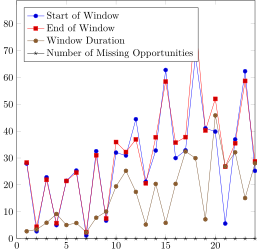

In [9]:
Axis([
    Plots.Linear(1:24, sdev_diff[1, :], legendentry="Start of Window")
    Plots.Linear(1:24, sdev_diff[2, :], legendentry="End of Window")
    Plots.Linear(1:24, sdev_diff[3, :], legendentry="Window Duration")
    Plots.Linear(1:24, missing_opportunities, legendentry="Number of Missing Opportunities")
], width="10cm", height="10cm", legendPos="north west", xmin=0, xmax=24, ymin=0)